# jsysoo팀

## 주제 : 학생들의 진로

## 조원 : 최수혁(조장), 안윤지(부조장), 김지우, 황성대

In [1]:
!pip install plotly
!pip install cufflinks

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings

%matplotlib inline

In [3]:
plt.rcParams["font.family"] = "Malgun Gothic"
plt.rcParams["axes.unicode_minus"] = False

In [4]:
jsysoo = pd.read_csv("data/대회 설문조사지.csv", encoding = "cp949")
jsysoo["희망 연봉"]=jsysoo["희망 연봉"].replace(["?"],[None]).astype("float")

# 대회 데이터

학생의 진로와 관련된 데이터를 알아내기 위해 아래와 같은 데이터를 구했습니다.
주로 학생의 학년, 성별, 학과(전공), 희망 연봉, 자격증 개수와 같은 데이터를 구했고,
다른 데이터를 추가로 구해 데이터를 가공했습니다.

In [11]:
jsysoo

,타임스탬프,학년,성별,학과(전공),취미,평균 공부 시간,공부하는 시간,자격증 개수,출석,평균 수면 시간,...,희망 연봉,학과 만족 O/X,취업 선호도,소셜 미디어 사용시간,통학 시간,학업 스트레스,교우관계,알바 유무,방과후 유무,방과후 만족도
0,2023. 10. 12 오후 12:21:46,2학년,남자,창업마케팅과,운동,1시간-2시간,방과후(저녁),4,절대 안빠지죠,6시간 이상 자요,...,3000.0,O,5,1시간-2시간,10-30분,2,3,X,O(아래 질문에 답변해주세요!),8.0
1,2023. 10. 12 오후 12:21:49,2학년,남자,창업마케팅과,게임,0-30분,기타,4,반년에 한두번 빠져요,4~6시간 자요,...,2000.0,O,5,2시간-3시간 이상,10-30분,3,2,X,O(아래 질문에 답변해주세요!),5.0
2,2023. 10. 12 오후 12:23:07,3학년,남자,소프트웨어개발과,게임,0-30분,기타,6,절대 안빠지죠,6시간 이상 자요,...,3000.0,O,7,1시간-2시간,10-30분,2,1,X,X,NaN
3,2023. 10. 12 오후 12:23:25,3학년,남자,소프트웨어개발과,게임,0-30분,밤,5,절대 안빠지죠,4~6시간 자요,...,3000.0,O,5,0-30분,10-30분,3,1,X,X,1.0
4,2023. 10. 12 오후 12:23:28,2학년,남자,창업마케팅과,음악,0-30분,기타,6,한달에 한두번 빠져요,2~4시간 자요,...,NaN,O,5,2시간-3시간 이상,1시간-2시간,1,1,O,X,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,2023. 10. 17 오후 3:24:40,2학년,남자,스마트웹콘텐츠과,게임,0-30분,방과후(저녁),4,한달에 한두번 이상 빠져요,6시간 이상 자요,...,4000.0,O,7,2시간-3시간 이상,10-30분,3,1,X,X,NaN
283,2023. 10. 17 오후 3:27:17,2학년,남자,스마트웹콘텐츠과,게임,0-30분,방과후(저녁),4,절대 안빠지죠,6시간 이상 자요,...,NaN,O,5,2시간-3시간 이상,10-30분,3,1,X,X,1.0
284,2023. 10. 17 오후 3:27:41,2학년,남자,스마트웹콘텐츠과,운동,2시간-3시간 이상,방과후(저녁),4,절대 안빠지죠,4~6시간 자요,...,NaN,O,4,1시간-2시간,30-1시간,3,1,X,O(아래 질문에 답변해주세요!),8.0
285,2023. 10. 17 오후 3:28:23,2학년,남자,스마트웹콘텐츠과,운동,30분-1시간,밤,2,한달에 한두번 빠져요,6시간 이상 자요,...,5000.0,O,5,1시간-2시간,30-1시간,3,3,O,X,NaN


In [10]:
jsysoo.columns

Index(['타임스탬프', '학년', '성별', '학과(전공)', '취미', '평균 공부 시간', '공부하는 시간', '자격증 개수',
       '출석', '평균 수면 시간', '희망 진로', '수업 집중도', '수업 집중도(전공)', '희망 연봉', '학과 만족 O/X',
       '취업 선호도', '소셜 미디어 사용시간', '통학 시간', '학업 스트레스', '교우관계', '알바 유무', '방과후 유무',
       '방과후 만족도'],
      dtype='object')

In [11]:
jsysoo.shape

(267, 23)

In [12]:
jsysoo.isnull().sum()

타임스탬프           0
학년              0
성별              0
학과(전공)          0
취미              0
평균 공부 시간        0
공부하는 시간         0
자격증 개수          0
출석              0
평균 수면 시간        0
희망 진로           0
수업 집중도          0
수업 집중도(전공)      0
희망 연봉           0
학과 만족 O/X       0
취업 선호도          0
소셜 미디어 사용시간     0
통학 시간           0
학업 스트레스         0
교우관계            0
알바 유무           0
방과후 유무          0
방과후 만족도        87
dtype: int64

부족한 데이터는 삭제하고, 채워지지 않은 데이터는 평균으로 채움
다시금 조사할 수 없으니 빠르게 평균으로 처리함

In [15]:
jsysoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   타임스탬프        267 non-null    object 
 1   학년           267 non-null    object 
 2   성별           267 non-null    object 
 3   학과(전공)       267 non-null    object 
 4   취미           267 non-null    object 
 5   평균 공부 시간     267 non-null    object 
 6   공부하는 시간      267 non-null    object 
 7   자격증 개수       267 non-null    object 
 8   출석           267 non-null    object 
 9   평균 수면 시간     267 non-null    object 
 10  희망 진로        267 non-null    object 
 11  수업 집중도       267 non-null    int64  
 12  수업 집중도(전공)   267 non-null    int64  
 13  희망 연봉        267 non-null    object 
 14  학과 만족 O/X    267 non-null    object 
 15  취업 선호도       267 non-null    int64  
 16  소셜 미디어 사용시간  267 non-null    object 
 17  통학 시간        267 non-null    object 
 18  학업 스트레스      267 non-null    int64  
 19  교우관계    

In [16]:
jsysoo.describe()

,수업 집중도,수업 집중도(전공),취업 선호도,학업 스트레스,교우관계,방과후 만족도
count,267.000000,267.000000,267.000000,267.00000,267.000000,180.000000
mean,6.865169,7.303371,6.584270,2.52809,2.044944,6.511111
std,2.160084,2.271453,2.604835,0.92285,0.987632,2.747246
min,1.000000,1.000000,0.000000,1.00000,1.000000,1.000000
25%,5.000000,6.000000,5.000000,2.00000,1.000000,5.000000
50%,7.000000,8.000000,7.000000,2.00000,2.000000,7.000000
75%,8.500000,9.000000,9.000000,3.00000,3.000000,9.000000
max,10.000000,10.000000,10.000000,4.00000,4.000000,10.000000


In [17]:
jsysoo.groupby("학년")["희망 진로"].value_counts()

학년   희망 진로  
1학년  취업         65
     아직 모르겠다    44
     대학교 진학     20
2학년  취업         66
     아직 모르겠다    27
     대학교 진학     16
3학년  대학교 진학     12
     취업         10
     아직 모르겠다     7
Name: 희망 진로, dtype: int64

<AxesSubplot:xlabel='학년,희망 진로'>

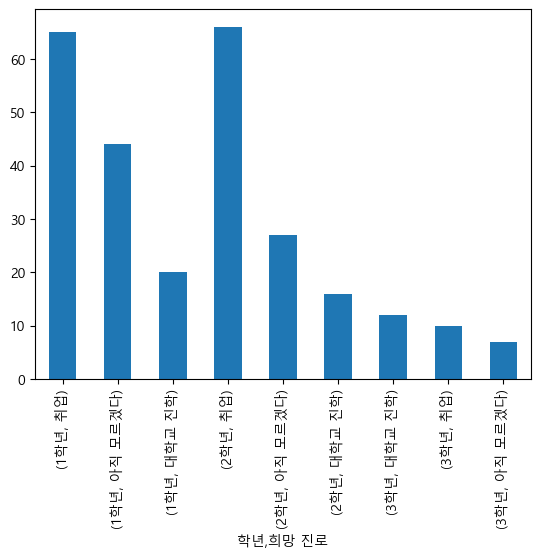

In [18]:
jsysoo.groupby("학년")["희망 진로"].value_counts().plot(kind="bar")

<AxesSubplot:xlabel='학과(전공),희망 진로'>

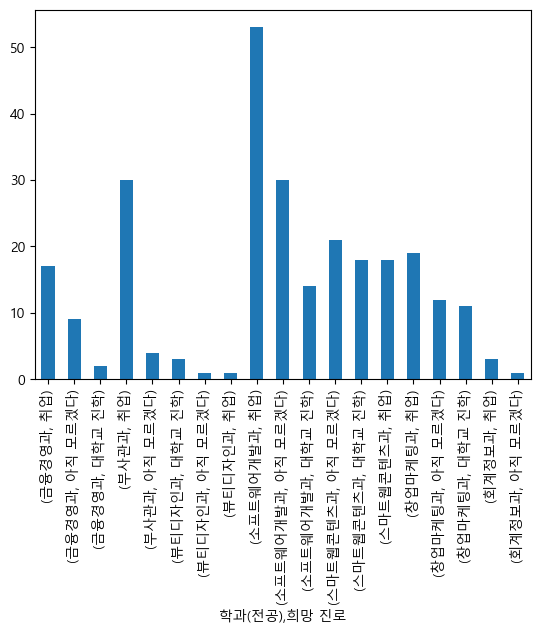

In [19]:
jsysoo.groupby("학과(전공)")["희망 진로"].value_counts().plot(kind="bar")

In [20]:
jsysoo.groupby("성별")["자격증 개수"].max()

성별
남자    9
여자    9
Name: 자격증 개수, dtype: object

In [21]:
jsysoo.groupby("자격증 개수")["성별"].value_counts()

자격증 개수  성별
1       남자    29
        여자    23
10      남자     1
10개 이상  남자     4
        여자     3
2       남자    41
        여자    27
3       남자    40
        여자    12
4       남자    40
        여자    10
5       남자    14
        여자     8
6       남자     4
        여자     2
7       남자     2
        여자     1
8       여자     3
        남자     1
9       남자     1
        여자     1
Name: 성별, dtype: int64

In [22]:
jsysoo.groupby("성별")["자격증 개수"].value_counts()

성별  자격증 개수
남자  2         41
    3         40
    4         40
    1         29
    5         14
    10개 이상     4
    6          4
    7          2
    10         1
    8          1
    9          1
여자  2         27
    1         23
    3         12
    4         10
    5          8
    10개 이상     3
    8          3
    6          2
    7          1
    9          1
Name: 자격증 개수, dtype: int64

<AxesSubplot:xlabel='성별,자격증 개수'>

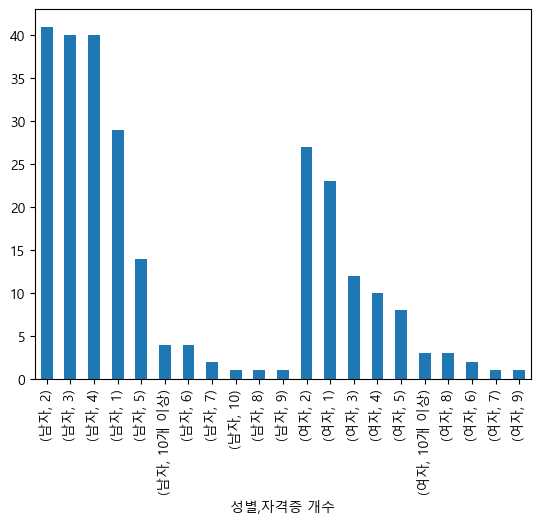

In [23]:
jsysoo.groupby("성별")["자격증 개수"].value_counts().plot(kind="bar")

<AxesSubplot:>

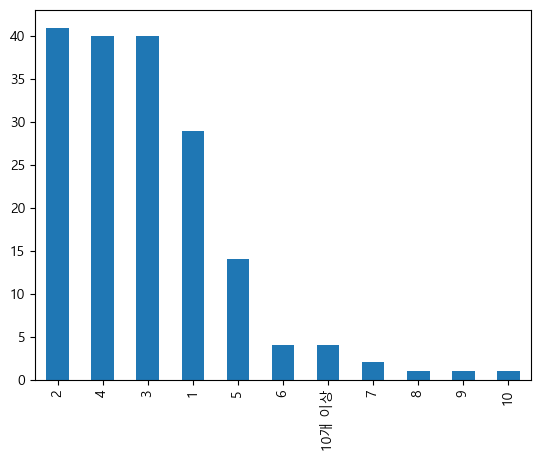

In [24]:
jsysoo[jsysoo["성별"]=="남자"]["자격증 개수"].value_counts().plot(kind="bar")

<AxesSubplot:>

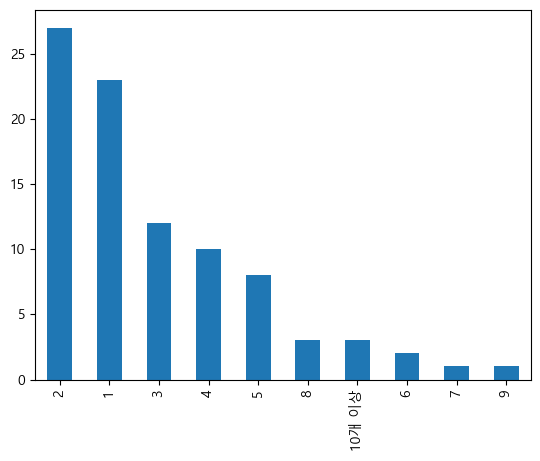

In [25]:
jsysoo[jsysoo["성별"]=="여자"]["자격증 개수"].value_counts().plot(kind="bar")

In [26]:
jsysoo.groupby("학년")["자격증 개수"].value_counts()

학년   자격증 개수
1학년  2         52
     1         43
     3         24
     4          6
     5          4
2학년  4         35
     3         27
     2         14
     5          9
     1          8
     10개 이상     5
     6          4
     8          3
     7          2
     10         1
     9          1
3학년  4          9
     5          9
     10개 이상     2
     2          2
     6          2
     1          1
     3          1
     7          1
     8          1
     9          1
Name: 자격증 개수, dtype: int64

<AxesSubplot:>

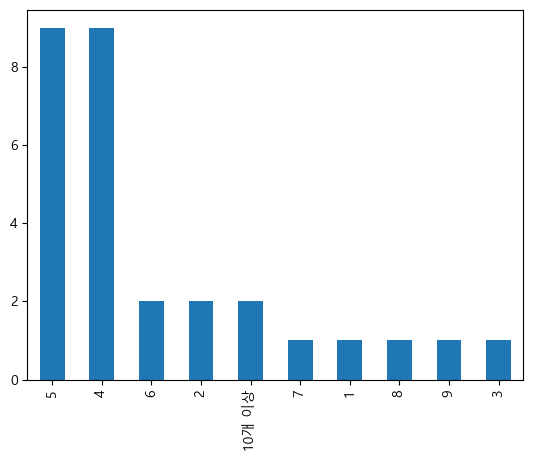

In [27]:
jsysoo[jsysoo["학년"]=="3학년"]["자격증 개수"].value_counts().plot(kind="bar")

# 10월 17일

In [31]:
jsysoo["성별"].value_counts()

남자    190
여자     97
Name: 성별, dtype: int64

In [26]:
male = jsysoo[jsysoo["성별"]=="남자"].sample(n=97)
female = jsysoo[jsysoo["성별"]=="여자"]

In [27]:
new_jsysoo = pd.concat([male,female])

In [28]:
new_jsysoo

,타임스탬프,학년,성별,학과(전공),취미,평균 공부 시간,공부하는 시간,자격증 개수,출석,평균 수면 시간,...,희망 연봉,학과 만족 O/X,취업 선호도,소셜 미디어 사용시간,통학 시간,학업 스트레스,교우관계,알바 유무,방과후 유무,방과후 만족도
133,2023. 10. 12 오후 3:51:38,1학년,남자,소프트웨어개발과,영상시청,0-30분,밤,2,절대 안빠지죠,2~4시간 자요,...,4000.0,O,10,2시간-3시간 이상,30-1시간,4,4,X,O(아래 질문에 답변해주세요!),10.0
181,2023. 10. 12 오후 4:51:27,3학년,남자,스마트웹콘텐츠과,음악,2시간-3시간 이상,밤,5,1년에 한두번 빠져요,6시간 이상 자요,...,4000.0,X,5,2시간-3시간 이상,30-1시간,4,1,X,X,NaN
134,2023. 10. 12 오후 3:51:47,1학년,남자,소프트웨어개발과,운동,2시간-3시간 이상,방과후(저녁),2,반년에 한두번 빠져요,6시간 이상 자요,...,3000.0,O,10,1시간-2시간,30-1시간,2,3,X,O(아래 질문에 답변해주세요!),10.0
196,2023. 10. 12 오후 6:12:23,2학년,남자,소프트웨어개발과,게임,30분-1시간,방과후(저녁),2,절대 안빠지죠,4~6시간 자요,...,3000.0,O,10,1시간-2시간,1시간-2시간,1,1,X,O(아래 질문에 답변해주세요!),10.0
233,2023. 10. 13 오전 8:59:48,1학년,남자,스마트웹콘텐츠과,게임,0-30분,기타,1,절대 안빠지죠,1~2시간 자요,...,NaN,O,2,30-1시간,10-30분,4,3,X,X,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273,2023. 10. 17 오후 3:08:40,2학년,여자,스마트웹콘텐츠과,운동,1시간-2시간,방과후(저녁),4,절대 안빠지죠,2~4시간 자요,...,2000.0,O,8,1시간-2시간,1시간-2시간,4,1,O,O(아래 질문에 답변해주세요!),9.0
274,2023. 10. 17 오후 3:08:43,2학년,여자,스마트웹콘텐츠과,영상시청,30분-1시간,밤,4,한달에 한두번 빠져요,4~6시간 자요,...,8000.0,O,7,2시간-3시간 이상,30-1시간,3,1,X,O(아래 질문에 답변해주세요!),5.0
277,2023. 10. 17 오후 3:13:28,2학년,여자,스마트웹콘텐츠과,운동,0-30분,밤,4,절대 안빠지죠,2~4시간 자요,...,NaN,X,5,2시간-3시간 이상,10-30분,3,2,X,X,9.0
281,2023. 10. 17 오후 3:23:18,2학년,여자,스마트웹콘텐츠과,게임,1시간-2시간,밤,4,한달에 한두번 빠져요,6시간 이상 자요,...,5000.0,O,3,1시간-2시간,1시간-2시간,2,2,X,X,3.0


In [29]:
new_jsysoo=pd.melt(new_jsysoo,id_vars=["학과(전공)"],value_vars=["희망 연봉"])

In [11]:
new_jsysoo

,학과(전공),variable,value
0,부사관과,희망 연봉,3000.0
1,스마트웹콘텐츠과,희망 연봉,3000.0
2,스마트웹콘텐츠과,희망 연봉,8000.0
3,창업마케팅과,희망 연봉,NaN
4,소프트웨어개발과,희망 연봉,3000.0
...,...,...,...
189,스마트웹콘텐츠과,희망 연봉,2000.0
190,스마트웹콘텐츠과,희망 연봉,8000.0
191,스마트웹콘텐츠과,희망 연봉,NaN
192,스마트웹콘텐츠과,희망 연봉,5000.0


Text(0, 0.5, '연봉')

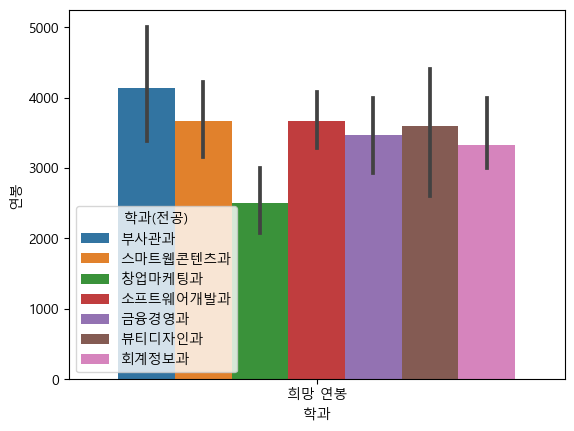

In [12]:
sns.barplot(data=new_jsysoo, x="variable", y="value",hue="학과(전공)", dodge=True)
plt.xlabel("학과")
plt.ylabel("연봉")

(1.0, 10.0)

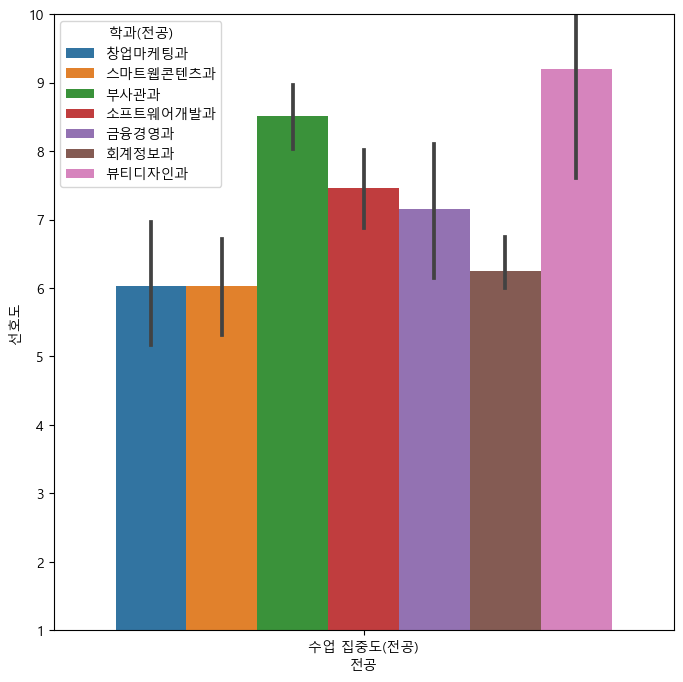

In [38]:
plt.figure(figsize=(8,8))
sns.barplot(data=new_jsysoo, x="variable", y="value",hue="학과(전공)", dodge=True)
plt.xlabel("전공")
plt.ylabel("선호도")
plt.ylim(1,10)

(1.0, 4.0)

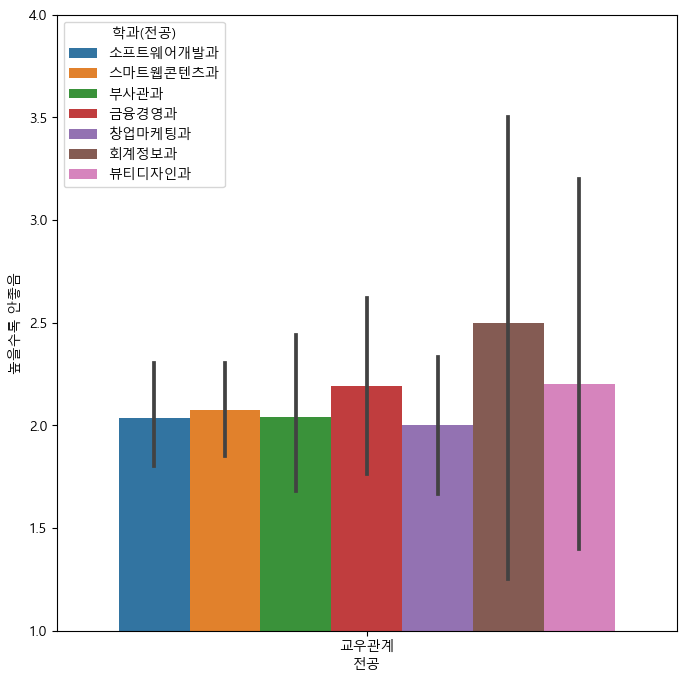

In [24]:
plt.figure(figsize=(8,8))
sns.barplot(data=new_jsysoo, x="variable", y="value",hue="학과(전공)", dodge=True)
plt.xlabel("전공")
plt.ylabel("높을수록 안좋음")
plt.ylim(1,4)

In [40]:
jsysoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   타임스탬프        287 non-null    object 
 1   학년           287 non-null    object 
 2   성별           287 non-null    object 
 3   학과(전공)       287 non-null    object 
 4   취미           287 non-null    object 
 5   평균 공부 시간     287 non-null    object 
 6   공부하는 시간      287 non-null    object 
 7   자격증 개수       287 non-null    object 
 8   출석           287 non-null    object 
 9   평균 수면 시간     287 non-null    object 
 10  희망 진로        287 non-null    object 
 11  수업 집중도       287 non-null    int64  
 12  수업 집중도(전공)   287 non-null    int64  
 13  희망 연봉        216 non-null    float64
 14  학과 만족 O/X    287 non-null    object 
 15  취업 선호도       287 non-null    int64  
 16  소셜 미디어 사용시간  287 non-null    object 
 17  통학 시간        287 non-null    object 
 18  학업 스트레스      287 non-null    int64  
 19  교우관계    

(1.0, 10.0)

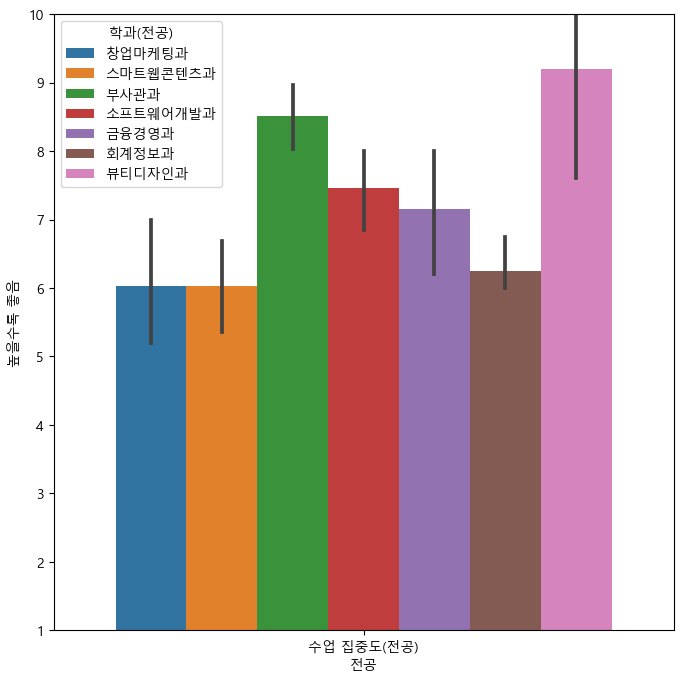

In [41]:
plt.figure(figsize=(8,8))
sns.barplot(data=new_jsysoo, x="variable", y="value",hue="학과(전공)", dodge=True)
plt.xlabel("전공")
plt.ylabel("높을수록 좋음")
plt.ylim(1,10)

# 10월 18일

##  ___sns.boxplot___

위에 sns.barplot보다 데이터의 밀집도를 볼 수 있다.

가운데선은 데이터의 평균을 의미하고,
바깥선은 데이터의 범위를 의미한다.

이에 따라 1학년의 평균 성적은 범위가 비슷하고
3학년의 평균 성적은 3학년 남자가 범위가 매우 넓다는 것을 알 수 있다.

**학과의 따른 희망 연봉 평균**

Text(0, 0.5, '연봉')

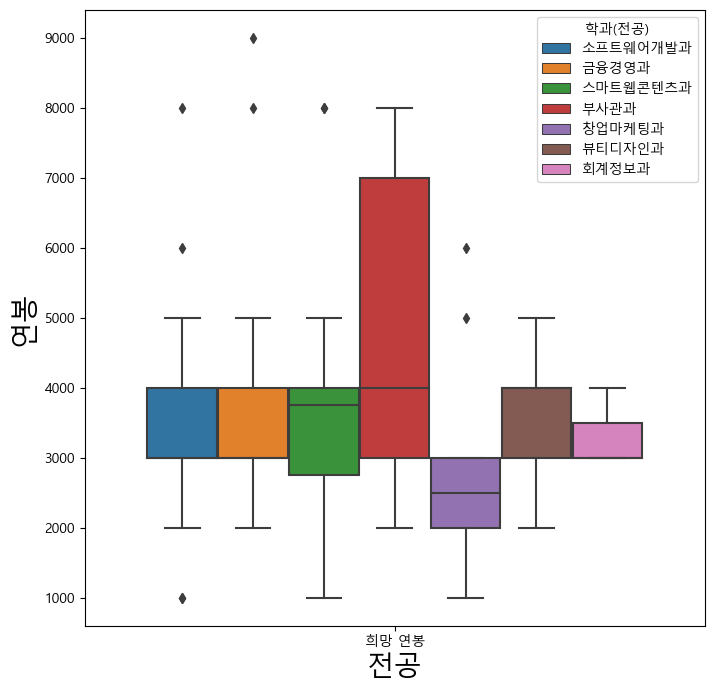

In [72]:
plt.figure(figsize=(8,8))
sns.boxplot(data=new_jsysoo, x="variable", y="value",hue="학과(전공)", dodge=True)
plt.xlabel("전공",fontsize = 20)
plt.ylabel("연봉",fontsize = 20)

In [69]:
new_jsysoo["성별"].value_counts()

남자    97
여자    97
Name: 성별, dtype: int64

In [92]:
new_jsysoo = pd.concat([male,female])
new_jsysoo=pd.melt(new_jsysoo,id_vars=["알바 유무"],value_vars=["희망 연봉"])

**자격증 개수의 따른 희망 연봉 평균**

Text(0, 0.5, '희망 연봉')

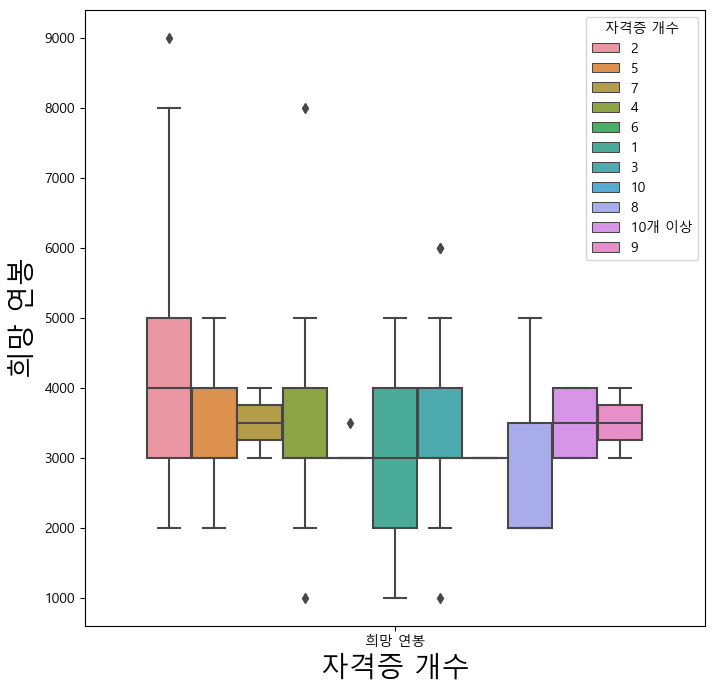

In [77]:
plt.figure(figsize=(8,8))
sns.boxplot(data=new_jsysoo, x="variable", y="value",hue="자격증 개수", dodge=True)
plt.xlabel("자격증 개수",fontsize = 20)
plt.ylabel("희망 연봉",fontsize = 20)

**성별의 따른 희망 연봉 평균**

Text(0, 0.5, '희망 연봉')

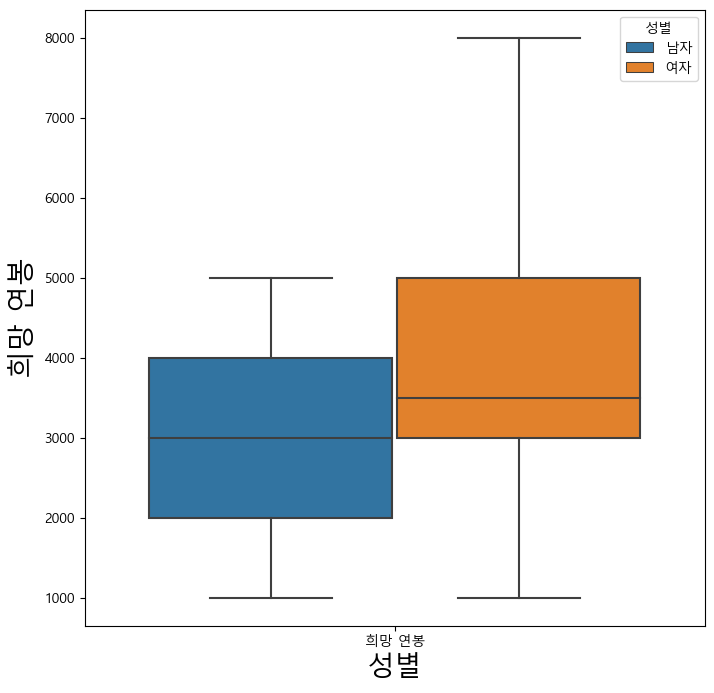

In [82]:
plt.figure(figsize=(8,8))
sns.boxplot(data=new_jsysoo, x="variable", y="value",hue="성별", dodge=True)
plt.xlabel("성별",fontsize = 20)
plt.ylabel("희망 연봉",fontsize = 20)

**학년별 희망 연봉 평균**

(0.0, 10000.0)

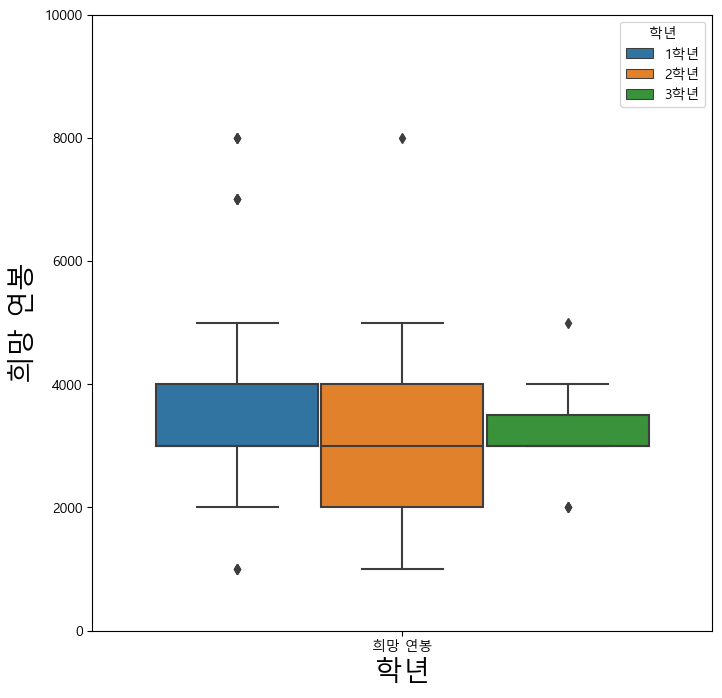

In [88]:
plt.figure(figsize=(8,8))
sns.boxplot(data=new_jsysoo, x="variable", y="value",hue="학년", dodge=True)
plt.xlabel("학년",fontsize = 20)
plt.ylabel("희망 연봉",fontsize = 20)
plt.ylim(0,10000)

**알바 유무의 따른 희망 연봉**

Text(0, 0.5, '희망 연봉')

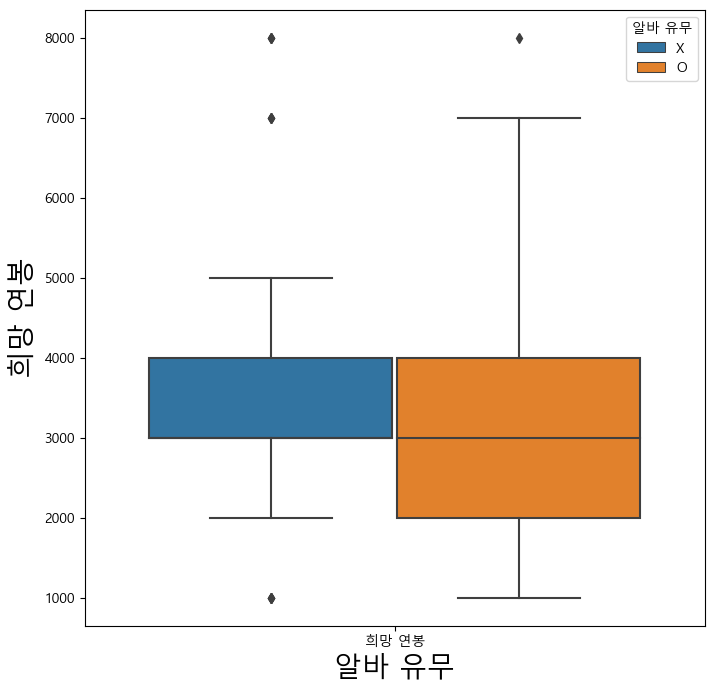

In [93]:
plt.figure(figsize=(8,8))
sns.boxplot(data=new_jsysoo, x="variable", y="value",hue="알바 유무", dodge=True)
plt.xlabel("알바 유무",fontsize = 20)
plt.ylabel("희망 연봉",fontsize = 20)

In [98]:
new_jsysoo = pd.concat([male,female])
new_jsysoo=pd.melt(new_jsysoo,id_vars=["학과(전공)"],value_vars=["수업 집중도(전공)"])

**학과의 따른 학업 스트레스**

Text(0, 0.5, '스트레스')

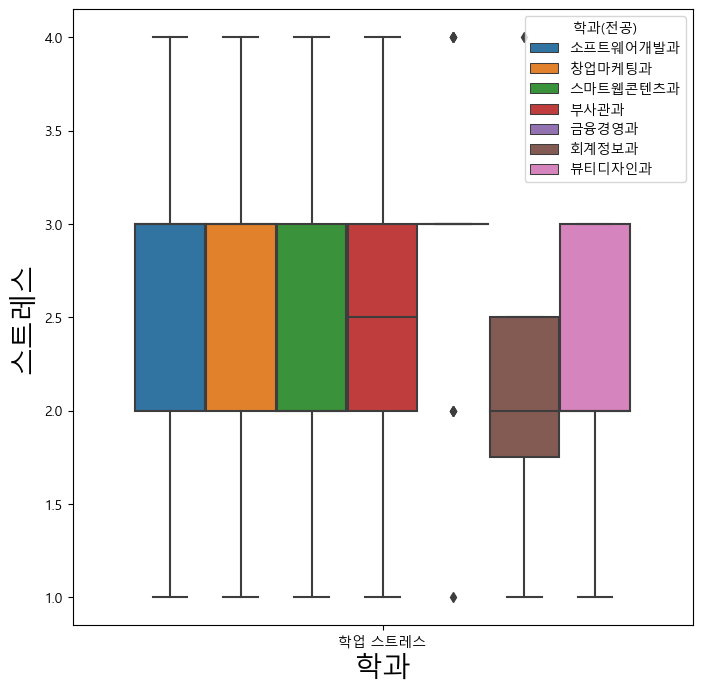

In [95]:
plt.figure(figsize=(8,8))
sns.boxplot(data=new_jsysoo, x="variable", y="value",hue="학과(전공)", dodge=True)
plt.xlabel("학과",fontsize = 20)
plt.ylabel("스트레스",fontsize = 20)

**학고의 따른 수업 집중도**

Text(0, 0.5, '수업 집중도')

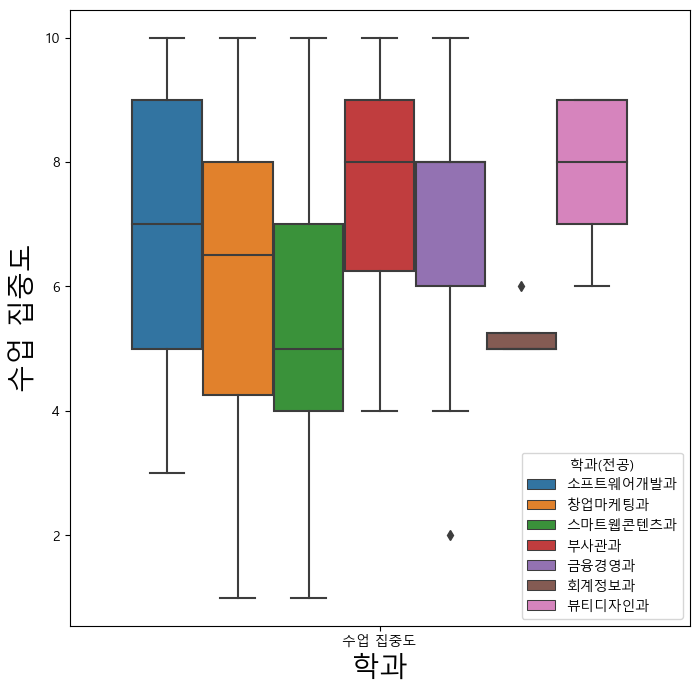

In [97]:
plt.figure(figsize=(8,8))
sns.boxplot(data=new_jsysoo, x="variable", y="value",hue="학과(전공)", dodge=True)
plt.xlabel("학과",fontsize = 20)
plt.ylabel("수업 집중도",fontsize = 20)

**학과의 따른 전공 집중도**

Text(0, 0.5, '전공 수업 집중도')

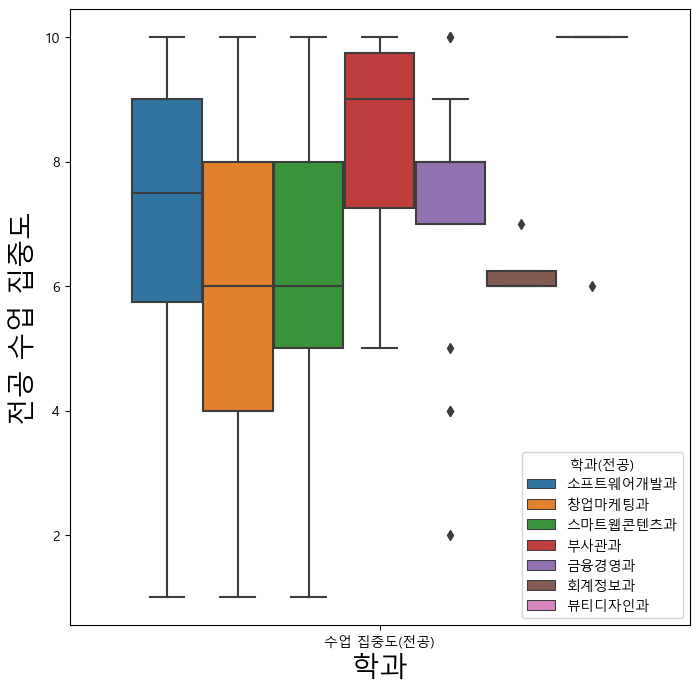

In [99]:
plt.figure(figsize=(8,8))
sns.boxplot(data=new_jsysoo, x="variable", y="value",hue="학과(전공)", dodge=True)
plt.xlabel("학과",fontsize = 20)
plt.ylabel("전공 수업 집중도",fontsize = 20)